# Import libraries

In [1]:
%pip install pybamm # install PyBaMM if it is not installed
import pybamm
import numpy as np
import matplotlib.pyplot as plt
import csv

ERROR: Invalid requirement: '#'


Note: you may need to restart the kernel to use updated packages.


In [2]:
pybamm.PARAMETER_PATH

['C:\\Users\\fussegli\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\fussegli',
 'C:\\Users\\fussegli\\Anaconda3\\lib\\site-packages\\pybamm\\input\\parameters']

**PyBaMM** (Python Battery Mathematical Modelling) solves physics-based electrochemical DAE models by using state-of-the-art automatic differentiation and numerical solvers.  
Repository: https://github.com/pybamm-team/PyBaMM

In [3]:
pybamm.print_citations()

[1] Charles R. Harris, K. Jarrod Millman, Stéfan J. van der Walt, Ralf Gommers, Pauli Virtanen, David Cournapeau, Eric Wieser, Julian Taylor, Sebastian Berg, Nathaniel J. Smith, and others. Array programming with NumPy. Nature, 585(7825):357–362, 2020. doi:10.1038/s41586-020-2649-2.
[2] Valentin Sulzer, Scott G. Marquis, Robert Timms, Martin Robinson, and S. Jon Chapman. Python Battery Mathematical Modelling (PyBaMM). Journal of Open Research Software, 9(1):14, 2021. doi:10.5334/jors.309.



# Set model

## Choose model: Doyle-Fuller-Newman (DFN)

### Select options  
Read documentation for more details https://pybamm.readthedocs.io/en/latest/source/models/base_models/base_battery_model.html

In [4]:
# Intercalation reaction
options = {"intercalation kinetics": "symmetric Butler-Volmer"} #  “symmetric Butler-Volmer” (default), “asymmetric Butler-Volmer”, “linear”, “Marcus”, or “Marcus-Hush-Chidsey”
# Thermal
options["thermal"] = "isothermal" # “isothermal” (default), “lumped”, “x-lumped”, or “x-full”.
options["calculate heat source for isothermal models"] = "false" # “false” (default) or “true”.
# Mechanics
options["particle mechanics"] = "none" # none” (default), “swelling only”, or “swelling and cracking”
options["stress-induced diffusion"] = "false" # “false” (default) or “true”. False if particle mechanics is none, true otherwise.
# Degradation
options["loss of active material"] = "none" #  “none” (default), “stress-driven”, “reaction-driven”, or “stress and reaction-driven”
options["lithium plating"] = "none" #  “none” (default), “reversible”, “partially reversible”, or “irreversible”.
options["SEI"] = "none" # “none”, "constant",reaction limited”, “solvent-diffusion limited”, “electron-migration limited”, “interstitial-diffusion limited”, or “ec reaction limited”
options["SEI film resistance"] = "none" # “none”, "distributed", "average"
options["SEI porosity change"] = "false" # “false” (default) or “true”.
# Applied Loading
options["operating mode"] = "current" #  “current” (default), “voltage”/”power”/”resistance”, “differential power”/”differential resistance”, “explicit power”/”explicit resistance”, “CCCV”.
options["working electrode"] = "both" # “both” (default) full cell, “negative” or “positive” to indicate a half-cell model.
# Particle description
options["particle"] = "Fickian diffusion" #  “Fickian diffusion” (default), “uniform profile”, “quadratic profile”, or “quartic profile”.
options["particle shape"] = "spherical" # “spherical” (default), or “no particles”, ()"user" ?)
options["particle size"] = "single" # “single” (default) or “distribution”

In [5]:
options

{'intercalation kinetics': 'symmetric Butler-Volmer',
 'thermal': 'isothermal',
 'calculate heat source for isothermal models': 'false',
 'particle mechanics': 'none',
 'stress-induced diffusion': 'false',
 'loss of active material': 'none',
 'lithium plating': 'none',
 'SEI': 'none',
 'SEI film resistance': 'none',
 'SEI porosity change': 'false',
 'operating mode': 'current',
 'working electrode': 'both',
 'particle': 'Fickian diffusion',
 'particle shape': 'spherical',
 'particle size': 'single'}

### Create model

In [6]:
model = pybamm.lithium_ion.DFN(options=options)

## Choose parameters

In [7]:
parameter_values = pybamm.ParameterValues("Chen2020")
#parameter_values = model.default_parameter_values

### Thickness

In [8]:
# Thickness [m]
Neg_cc_thickness = 2.5e-05
Neg_electrode_thickness = 49.95e-6
Sep_thickness = 9.99e-6
Pos_electrode_thickness = 49.95e-6
Pos_cc_thickness = 2.5e-05
# Height and width [m]
Electrode_height = 66.6e-6
Electrode_width = 66.6e-6

# Cell volume is deduced from above thickness and dimensions [m3]
full_thickness = Neg_cc_thickness + Neg_electrode_thickness + Sep_thickness + Pos_electrode_thickness + Pos_cc_thickness
cell_volume = full_thickness * Electrode_height * Electrode_width

# Update parameters
parameter_values.update({"Negative electrode thickness [m]": Neg_electrode_thickness})
parameter_values.update({"Separator thickness [m]": Sep_thickness})
parameter_values.update({"Positive electrode thickness [m]": Pos_electrode_thickness})
parameter_values.update({"Negative current collector thickness [m]": Neg_cc_thickness})
parameter_values.update({"Positive current collector thickness [m]": Pos_cc_thickness})
parameter_values.update({"Electrode height [m]": Electrode_height})
parameter_values.update({"Electrode width [m]": Electrode_width})
parameter_values.update({"Cell volume [m3]": cell_volume})

### Microstructure parameters

In [9]:
# Porosity
Neg_electrode_porosity = 0.3847
Pos_electrode_porosity = 0.3847
Sep_porosity = 1.0

# Active material volume fraction
Neg_electrode_AM = 1-Neg_electrode_porosity
Pos_electrode_AM = 1-Pos_electrode_porosity

# Radius [m]
Neg_particle_radius = 4.662e-6 # CPSD: 7.968/2=3.984, pixel number: 4.662e-6, EDMF: 10.35/2=5.18
Pos_particle_radius = Neg_particle_radius

# Bruggeman exponent
Ele_Neg_p = 1.602
Ele_Pos_p = 1.602
Sep_p = 1.0

# Update parameters
parameter_values.update({"Negative electrode porosity": Neg_electrode_porosity})
parameter_values.update({"Separator porosity": Sep_porosity})
parameter_values.update({"Positive electrode porosity": Pos_electrode_porosity})

parameter_values.update({"Negative electrode active material volume fraction": Neg_electrode_AM})
parameter_values.update({"Positive electrode active material volume fraction": Pos_electrode_AM})

parameter_values.update({"Negative particle radius [m]": Neg_particle_radius})
parameter_values.update({"Positive particle radius [m]": Pos_particle_radius})

parameter_values.update({"Negative electrode Bruggeman coefficient (electrolyte)": Ele_Neg_p})
parameter_values.update({"Positive electrode Bruggeman coefficient (electrolyte)": Ele_Pos_p})
parameter_values.update({"Separator Bruggeman coefficient (electrolyte)": Sep_p})

### Material coefficients

#### Anode

In [10]:
# Maximum concentration [mol.m-3]
Neg_Csmax = 28000.0 

# Conducitvity [S.m-1]
Neg_AM_conductivity = 100

# Diffusivity [m2.s-1]
Neg_AM_diffusivity = 1.0e-14

# OCP [V]
def Neg_OCP(sto):
    a7 = -201.8048
    a6 = 730.918
    a5 = -1074.645
    a4 = 825.0173
    a3 = -354.3316
    a2 = 84.66978
    a1 = -10.57909
    a0 = 0.6848288
    u_eq = ((((((a7*sto+a6)*sto+a5)*sto+a4)*sto+a3)*sto+a2)*sto+a1)*sto+a0
    #a = (0.1-1.0)/(1-0)
    #b = 1.0
    #u_eq = a * sto + b
    return u_eq

# Exchange-current density [A.m-2] 
def Neg_io(c_e, c_s_surf, T):
    #cs_max = Parameter("Maximum concentration in negative electrode [mol.m-3]")
    cs_max = 28000.0 # [mol.m-3]
    return 1.076 * 11 * (c_e/1000)** 0.5 * (c_s_surf/cs_max)** 0.5 * (1-c_s_surf/cs_max)** 0.5

# Update parameters
parameter_values.update({"Negative electrode conductivity [S.m-1]": Neg_AM_conductivity})
parameter_values.update({"Negative electrode diffusivity [m2.s-1]": Neg_AM_diffusivity})
parameter_values.update({"Negative electrode OCP [V]": Neg_OCP})
parameter_values.update({"Negative electrode exchange-current density [A.m-2]": Neg_io})


#### Cathode

In [11]:
# Maximum concentration [mol.m-3]
Pos_Csmax = 49600.0

# Conducitvity [S.m-1]
Pos_AM_conductivity = 10

# Diffusivity [m2.s-1]
Pos_AM_diffusivity = 1.0e-15

# OCP [V]
def Pos_OCP(sto):
    a3 = -1.371166
    a2 = 3.9033218
    a1 = -4.3438781
    a0 = 5.3701447
    u_eq = ((a3*sto+a2)*sto+a1)*sto+a0;    
    #a = 2
    #b = -4
    #c = 5
    #u_eq = a*sto*sto + b*sto + c
    return u_eq

# Exchange-current density [A.m-2] 
def Pos_io(c_e, c_s_surf, T):
    #cs_max = Parameter("Maximum concentration in positive electrode [mol.m-3]")
    cs_max = 49600 # [mol.m-3]
    return 1.076 * 7 * (c_e/1000)** 0.5 * (c_s_surf/cs_max)** 0.5 * (1-c_s_surf/cs_max)** 0.5
    
# Update parameters
parameter_values.update({"Positive electrode conductivity [S.m-1]": Pos_AM_conductivity})
parameter_values.update({"Positive electrode diffusivity [m2.s-1]": Pos_AM_diffusivity})
parameter_values.update({"Positive electrode OCP [V]": Pos_OCP})
parameter_values.update({"Positive electrode exchange-current density [A.m-2]": Pos_io})

#### Electrolyte

In [12]:
# Transference number
Ele_tplus = 0.0

# 1+activity coefficient (i.e., 1 + dlnf/dlnc)
Ac_plus_one = 0.0

# Conducitvity [S.m-1]
Ele_conductivity = 1.0
def Ele_f_conductivity(c_e, foo1):
    a0 = 0.0
    a1 = 0.002184643837703
    a2 = -1.577170931848559e-06
    a3 = 4.120782790092705e-10
    a4 = -4.443882945301638e-14
    a5 = 1.558277114134419e-18
    return a0 + a1*c_e + a2*(c_e**2) + a3*(c_e**3) + a4*(c_e**4) + a5*(c_e**5)

# Diffusivity [m2.s-1]
Ele_diffusivity = 1.0e-10 
def Ele_f_diffusivity(c_e, foo1):
    a0 = 3.409857e-10
    a1 = -2.553199e-13
    a2 = 9.229720e-17
    a3 = -2.249695e-20
    a4 = 3.510337e-24
    a5 = -2.369022e-28
    return a0 + a1*c_e + a2*(c_e**2) + a3*(c_e**3) + a4*(c_e**4) + a5*(c_e**5)

# Update parameters
parameter_values.update({"Cation transference number": Ele_tplus})
parameter_values.update({"1 + dlnf/dlnc": Ac_plus_one})
parameter_values.update({"Electrolyte conductivity [S.m-1]": Ele_conductivity})
parameter_values.update({"Electrolyte diffusivity [m2.s-1]": Ele_f_diffusivity})


### Initial conditions

In [13]:
# Initial concentration [mol.m-3]
Sep_c_at_rest = 1200.0
Neg_C_ini = 0.1*Neg_Csmax
Pos_C_ini = 0.9*Pos_Csmax
# SOC range
Neg_SOCrange = 1.0-0.0
Pos_SOCrange = 1.0-0.4

# Update parameters
parameter_values.update({"Maximum concentration in negative electrode [mol.m-3]": Neg_Csmax})
parameter_values.update({"Maximum concentration in positive electrode [mol.m-3]": Pos_Csmax})
parameter_values.update({"Typical electrolyte concentration [mol.m-3]": Sep_c_at_rest})

parameter_values.update({"Initial concentration in negative electrode [mol.m-3]": Neg_C_ini})
parameter_values.update({"Initial concentration in positive electrode [mol.m-3]": Pos_C_ini})
parameter_values.update({"Initial concentration in electrolyte [mol.m-3]": Sep_c_at_rest})

### Applied current and cut-off voltage

In [14]:
# C-rate
Crate = 6.0
low_cutoff = 0.5 # [V]
high_cutoff = 5.0 # [V]

# Active material volume [m3]
Neg_volume = Neg_electrode_thickness * Electrode_height * Electrode_width * Neg_electrode_AM
Pos_volume = Pos_electrode_thickness * Electrode_height * Electrode_width * Pos_electrode_AM
# Faraday constant [C.mol-1]
Fday = 96485.332 

# Capacity [C]
Neg_theoritical_capacity = Neg_volume * Neg_Csmax * Fday
Pos_theoritical_capacity = Pos_volume * Pos_Csmax * Fday
Neg_pratical_capacity = Neg_theoritical_capacity * Neg_SOCrange
Pos_pratical_capacity = Pos_theoritical_capacity * Pos_SOCrange
Cell_pratical_capacity = np.min([Neg_pratical_capacity,Pos_pratical_capacity])
Cell_NP_ratio = Neg_pratical_capacity/Pos_pratical_capacity
Nominal_cell_capacity_Ah = Cell_pratical_capacity*3600

# Applied current
t_charge = 1/Crate * 3600 # [s]
current_1C = Cell_pratical_capacity/3600 # [A]
Applied_current = -current_1C * Crate # [A]

# Update parameters
parameter_values.update({"Typical current [A]": Applied_current})
parameter_values.update({"Current function [A]": Applied_current})
parameter_values.update({"Nominal cell capacity [A.h]": Nominal_cell_capacity_Ah})
parameter_values.update({"Lower voltage cut-off [V]": low_cutoff})
parameter_values.update({"Upper voltage cut-off [V]": high_cutoff})

In [15]:
Applied_current

-6.138170427217434e-07

### List parameters

In [16]:
format_str = '{:<75}  {:>20}'
print(format_str.format('PARAMETER', 'VALUE'))
print("-"*97)
for key, value in parameter_values.items():
    try:
        print(format_str.format(key, value))
    except TypeError:
        print(format_str.format(key, value.__str__()))

PARAMETER                                                                                   VALUE
-------------------------------------------------------------------------------------------------
Negative current collector thickness [m]                                                  2.5e-05
Negative electrode thickness [m]                                                        4.995e-05
Separator thickness [m]                                                                  9.99e-06
Positive electrode thickness [m]                                                        4.995e-05
Positive current collector thickness [m]                                                  2.5e-05
Electrode height [m]                                                                     6.66e-05
Electrode width [m]                                                                      6.66e-05
Cell cooling surface area [m2]                                                            0.00531
Cell volume [m3]    

* You can explore a variety of parameters, listed under < parameter_values >.
* You can search using keyword < parameter_values >.variables.search("electrolyte").

In [17]:
#parameter_values

In [18]:
parameter_values["Negative electrode OCP [V]"]

<function __main__.Neg_OCP(sto)>

In [19]:
# parameter_values.search("utilisation")

### Applied loading

experiment = pybamm.Experiment(
    [
        ("Charge at 0.5 A until 4.1 V",
        "Hold at 4.1 V until 50 mA")
    ]
)

In [20]:
experiment_cycling = pybamm.Experiment(
    [
        ("Discharge at C/10 for 10 hours or until 3.3 V",
        "Rest for 1 hour",
        "Charge at 1 A until 4.1 V",
        "Hold at 4.1 V until 50 mA",
        "Rest for 1 hour"),
    ] * 1
)

experiment_CC_CV = pybamm.Experiment(
    [
        ("Charge at 0.352 A until 4.2 V",
        "Hold at 4.2 V until 50 mA"),
    ] * 1
)

experiment_CC = pybamm.Experiment(
    [
        ("Charge at 0.352 A until 4.2 V"),
    ] * 1
)

## Solver options

Documentation: https://pybamm.readthedocs.io/en/latest/source/solvers/index.html

In [21]:
solver = pybamm.CasadiSolver(atol=1e-7, rtol=1e-7, mode="safe",dt_max=1.0)

## Mesh options

In [22]:
var_pts = {
    "x_n": 150,  # negative electrode
    "x_s": 30,  # separator 
    "x_p": 150,  # positive electrode
    "r_n": 100,  # negative particle
    "r_p": 100,  # positive particle
}

#var_pts = {
#    "x_n": 50,  # negative electrode
#    "x_s": 10,  # separator 
#    "x_p": 50,  # positive electrode
#    "r_n": 15,  # negative particle
#    "r_p": 15,  # positive particle
#}

## Solve model

In [23]:
#sim = pybamm.Simulation(model,parameter_values=parameter_values,experiment=experiment_CC_CV,solver=solver,var_pts=var_pts)
sim = pybamm.Simulation(model,parameter_values=parameter_values,solver=solver,var_pts=var_pts)

In [24]:
#sim.solve()
t_eval = np.linspace(0, 100, 100*10)

#t_eval = np.linspace(0, 200, 200)


sim.solve(t_eval)

# Post-processing

There are two variables for most quantities. This is because PyBaMM utilises both _dimensionless_ and _dimensional_ variables for these quantities.  
* You can explore a variety of outputs, listed under < model >.variable_names.
* You can search using keyword < model >.variables.search("electrolyte").

## Potential and concentration along cell thickness

In [25]:
output_variables = ["Negative electrode potential [V]", "Electrolyte potential [V]","Positive electrode potential [V]","R-averaged negative particle concentration [mol.m-3]", "Electrolyte concentration [mol.m-3]","R-averaged positive particle concentration [mol.m-3]"]
sim.plot(output_variables=output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', step=1.0), Output()), _dom_classes=('widget-inte…

## Concentration and potential averaged quantitied

In [26]:
sim.plot([["X-averaged negative electrode potential [V]", "X-averaged electrolyte potential [V]", "X-averaged positive electrode potential [V]"],"X-averaged negative electrode potential [V]", "X-averaged electrolyte potential [V]", "X-averaged positive electrode potential [V]",["Average negative particle concentration","X-averaged electrolyte concentration","Average positive particle concentration"],"Average negative particle concentration [mol.m-3]","X-averaged electrolyte concentration [mol.m-3]","Average positive particle concentration [mol.m-3]"])


interactive(children=(FloatSlider(value=0.0, description='t', step=1.0), Output()), _dom_classes=('widget-inte…

## Cell voltage component

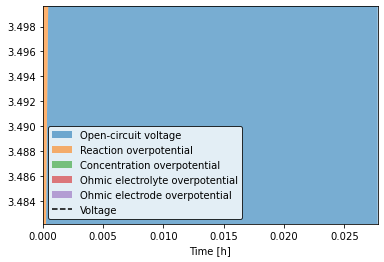

<AxesSubplot:xlabel='Time [h]'>

In [27]:
pybamm.plot_voltage_components(sim.solution)

In [28]:
pybamm.dynamic_plot(sim.solution, ["Terminal voltage [V]"], time_unit="seconds")    

interactive(children=(FloatSlider(value=0.0, description='t', step=1.0), Output()), _dom_classes=('widget-inte…

## Temperature

In [29]:
sim.plot([["X-averaged negative electrode temperature [K]","X-averaged separator temperature [K]","X-averaged positive electrode temperature [K]"],"Cell temperature [K]",])

interactive(children=(FloatSlider(value=0.0, description='t', step=1.0), Output()), _dom_classes=('widget-inte…

In [30]:
model.variable_names() 

['Time',
 'Time [s]',
 'Time [min]',
 'Time [h]',
 'x',
 'x [m]',
 'x_n',
 'x_n [m]',
 'x_s',
 'x_s [m]',
 'x_p',
 'x_p [m]',
 'Sum of electrolyte reaction source terms',
 'Sum of positive electrode electrolyte reaction source terms',
 'Sum of x-averaged positive electrode electrolyte reaction source terms',
 'Sum of interfacial current densities',
 'Sum of positive electrode interfacial current densities',
 'Sum of x-averaged positive electrode interfacial current densities',
 'Sum of negative electrode electrolyte reaction source terms',
 'Sum of x-averaged negative electrode electrolyte reaction source terms',
 'Sum of negative electrode interfacial current densities',
 'Sum of x-averaged negative electrode interfacial current densities',
 'r_p',
 'r_p [m]',
 'r_n',
 'r_n [m]',
 'Current density variable',
 'Total current density',
 'Total current density [A.m-2]',
 'Current [A]',
 'C-rate',
 'Discharge capacity [A.h]',
 'Porosity',
 'Separator porosity',
 'Positive electrode porosi

In [31]:
model.variables.search("open")

Change in measured open circuit voltage
Change in measured open circuit voltage [V]
Measured battery open circuit voltage [V]
Measured open circuit voltage
Measured open circuit voltage [V]
Negative electrode open circuit potential
Negative electrode open circuit potential [V]
Negative electrode oxygen open circuit potential
Negative electrode oxygen open circuit potential [V]
Positive electrode open circuit potential
Positive electrode open circuit potential [V]
Positive electrode oxygen open circuit potential
Positive electrode oxygen open circuit potential [V]
X-averaged battery open circuit voltage [V]
X-averaged negative electrode open circuit potential
X-averaged negative electrode open circuit potential [V]
X-averaged negative electrode oxygen open circuit potential
X-averaged negative electrode oxygen open circuit potential [V]
X-averaged open circuit voltage
X-averaged open circuit voltage [V]
X-averaged positive electrode open circuit potential
X-averaged positive electrode o

In [32]:
sim.plot(["X-averaged negative electrode open circuit potential [V]","X-averaged positive electrode open circuit potential [V]",])

interactive(children=(FloatSlider(value=0.0, description='t', step=1.0), Output()), _dom_classes=('widget-inte…

# Export to csv

#### Access solution variables

In [33]:
solution = sim.solution

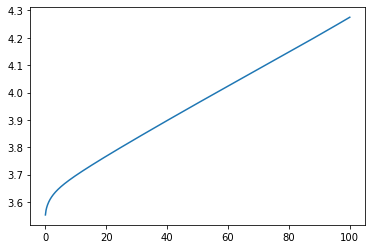

In [34]:
t = solution["Time [s]"]
V = solution["Terminal voltage [V]"]
# x = solution["x [m]"]
plt.plot(t.entries, V.entries)
plt.show()

_Averaged quantities_

In [35]:
save_avg_variables = ["Time [s]", "Current [A]", "Terminal voltage [V]","X-averaged negative electrode potential [V]", "X-averaged electrolyte potential [V]", "X-averaged positive electrode potential [V]","Average negative particle concentration [mol.m-3]","X-averaged electrolyte concentration [mol.m-3]","Average positive particle concentration [mol.m-3]"]
solution.save_data("Averaged_quantities.csv",save_avg_variables, to_format="csv")

_Along thickness quantities_

In [36]:
# X and time axis
x = solution["x [m]"]
x = x.entries[:,0]
x = np.reshape(x, (-1, 1)) # 2d array of size (n,11)
xn = solution["x_n [m]"]
xn = xn.entries[:,0]
xn = np.reshape(xn, (-1, 1)) # 2d array of size (n,11)
xp = solution["x_p [m]"]
xp = xp.entries[:,0]
xp = np.reshape(xp, (-1, 1)) # 2d array of size (n,11)

t = solution["Time [s]"]
t = np.concatenate(([-1], t.entries), axis=0)
t = np.reshape(t, (1, -1)) # 2d array of size (n,11)

In [37]:
save_along_cell_thickness_variables = ["Electrolyte potential [V]","Electrolyte concentration [mol.m-3]","Cell temperature [K]"]
for var in save_along_cell_thickness_variables:
    with open((var + '.csv'),"w+") as my_csv:
        csvWriter = csv.writer(my_csv,delimiter=',')
        new = np.concatenate((x, solution[var].entries), axis=1) # Add thickness axis
        new = np.concatenate((t, new), axis=0) # Add time axis
        csvWriter.writerows(new)
        
save_along_anode_thickness_variables = ["Negative electrode potential [V]","R-averaged negative particle concentration [mol.m-3]"]
for var in save_along_anode_thickness_variables:
    with open((var + '.csv'),"w+") as my_csv:
        csvWriter = csv.writer(my_csv,delimiter=',')
        new = np.concatenate((xn, solution[var].entries), axis=1) # Add thickness axis
        new = np.concatenate((t, new), axis=0) # Add time axis
        csvWriter.writerows(new)
        
save_along_cathode_thickness_variables = ["Positive electrode potential [V]","R-averaged positive particle concentration [mol.m-3]"]
for var in save_along_cathode_thickness_variables:
    with open((var + '.csv'),"w+") as my_csv:
        csvWriter = csv.writer(my_csv,delimiter=',')
        new = np.concatenate((xp, solution[var].entries), axis=1) # Add thickness axis
        new = np.concatenate((t, new), axis=0) # Add time axis
        csvWriter.writerows(new)       

        
        
        

In [38]:
t

array([[ -1.       ,   0.       ,   0.1001001, ...,  99.7997998,
         99.8998999, 100.       ]])

In [39]:
pwd

'C:\\Users\\fussegli'